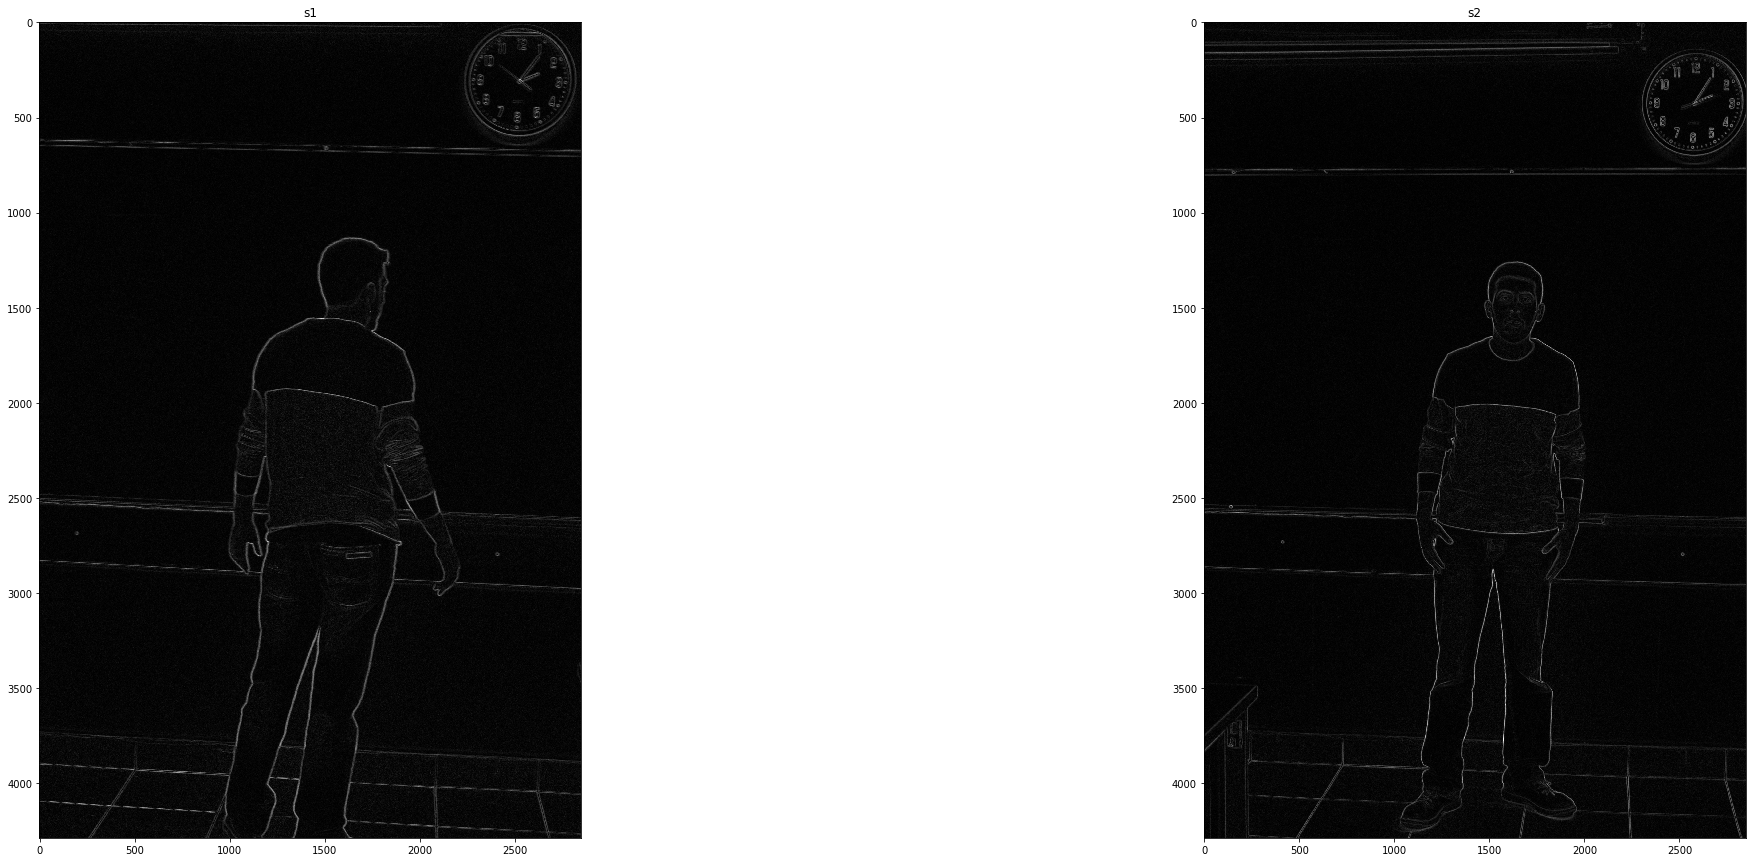

In [1]:
import cv2
from matplotlib import pyplot as plt

from finalProject.utils.images.imagesUtils import Image


def gray(path):
    imageclass = Image(path)
    imageclass.read_image(return_img=False)
    return imageclass.gray(return_img=True)


path1 = 'dataset/images/DSC_0057.JPG'
path2 = 'dataset/images/DSC_0054.JPG'
image1 = gray(path1)
image2 = gray(path2)


def sobel(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    sobel_intensity = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0),
                                               1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))
    return sobel_intensity


## sobel


s1 = sobel(image1)
s2 = sobel(image2)

plt.figure(figsize=[80, 15])

plt.subplot(141)
plt.imshow(s1,cmap='gray')
plt.title("s1")

plt.subplot(142)
plt.imshow(s2,cmap='gray')
plt.title("s2")

plt.show()

In [2]:
from finalProject.utils.keyPoints.AlgoritamKeyPoints import SiftDetectKeyPoints
from finalProject.utils.matchers.Matchers import flannmatcher

In [3]:
import numpy as np

In [4]:
# norm

In [5]:
def sobel_keypoints(r):
    sobelImage = sobel(r)
    # norm
    image8bit = cv2.normalize(sobelImage, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    k,d = SiftDetectKeyPoints(image8bit)
    return k,d,image8bit

In [6]:
image1 = gray(path1)
image1 = cv2.resize(image1,(400,400))
fromCenter = False
r1 = cv2.selectROI(image1, fromCenter)

In [7]:
image2 = gray(path2)
image2 = cv2.resize(image2,(400,400))
fromCenter = False
r2 = cv2.selectROI(image2, fromCenter)

In [ ]:
k1,d1,image1 = sobel_keypoints(r1)

In [7]:
k2,d2,image2 = sobel_keypoints(r2)

In [202]:
match = flannmatcher(d1,d2)

TypeError: object of type 'NoneType' has no len()

In [ ]:
output = cv2.drawMatchesKnn(image1,k1,image2,k2,match,outImg=None)

In [ ]:
plt.figure(figsize=[80, 15])

In [1]:
plt.imshow(output,cmap='gray')
plt.show()

NameError: name 'plt' is not defined